In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import pearsonr
import numpy as np
import zipfile
import requests
import io


dataset_file = '/content/drive/MyDrive/Mestrado/EAD/AED-TrabalhoFinal/dataset.zip'
work_dir = '/tmp/'
with zipfile.ZipFile(dataset_file, 'r') as zip_ref:
    zip_ref.extractall(work_dir)

# Read both dataset groups
df_math = pd.read_csv('/tmp/student-mat.csv')
df_portuguese = pd.read_csv('/tmp/student-por.csv')
# Unify the dataset into a single dataframe
df = pd.concat([df_math, df_portuguese])

print(df.columns)
print(df.shape)
print(df.describe())
null_count = df.isnull().sum()
if null_count.max() > 0:
  row_count = df.shape[0]
  print(f'Dataset null/total: {null_count}/{row_count}')
else:
  print(f'Dataset limpo')


df.drop(['school', 'age'], axis=1, inplace=True)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
(1044, 33)
               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.

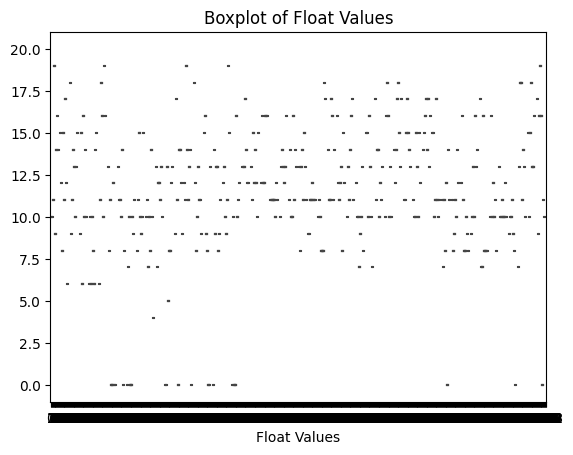

In [2]:
fig, ax = plt.subplots()
sns.boxplot(data=df['G3'], ax=ax)

ax.set_title('Boxplot of Float Values')
ax.set_xlabel('Float Values')

plt.show()

<ipython-input-3-45377b96d3ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


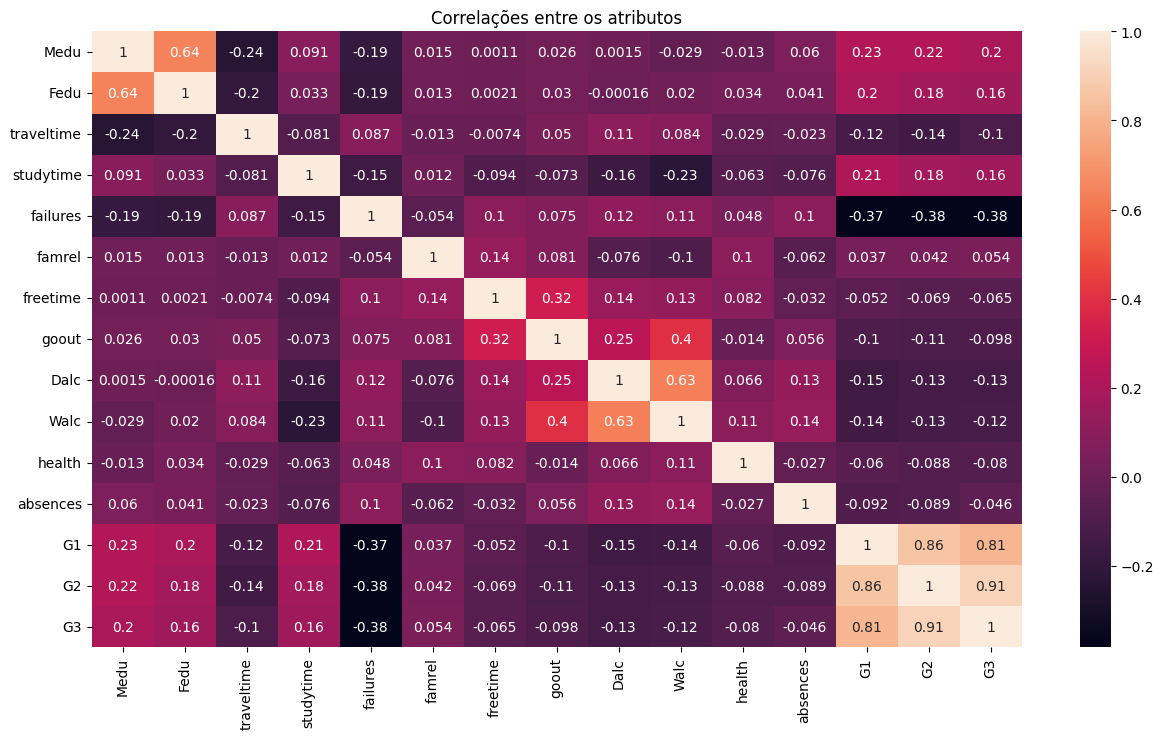

In [3]:
# Plot the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlações entre os atributos")
plt.show()

Non-daily drinkers score 11.743718592964823
Daily drinkers score 11.094427244582043


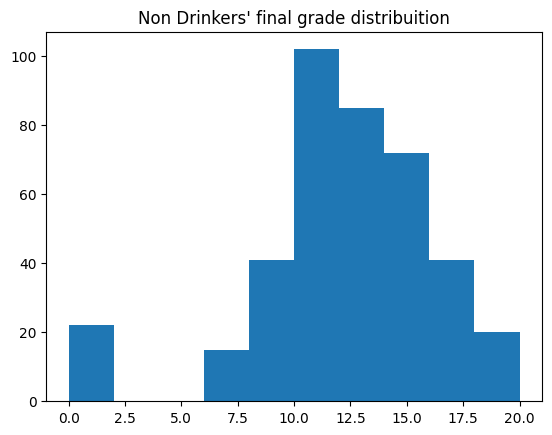

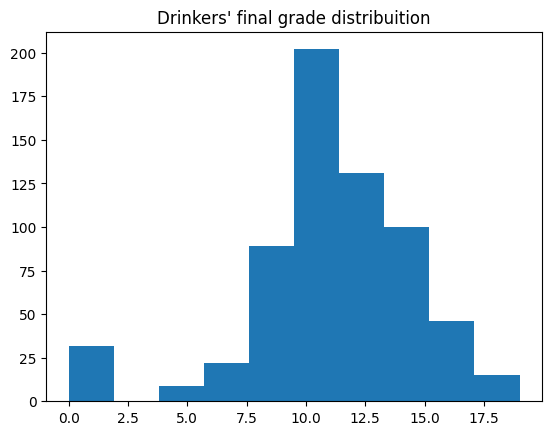

In [4]:
threshold = 2
drinkers = df[df['Walc'] >= threshold]
non_drinkers = df[df['Walc'] < threshold]
non_drinkers_avg_grade = non_drinkers['G3'].mean()
drinkers_avg_grade = drinkers['G3'].mean()
print(f'Non-daily drinkers score {non_drinkers_avg_grade}')
print(f'Daily drinkers score {drinkers_avg_grade}')

plt.hist(non_drinkers['G3'])
plt.title('Non Drinkers\' final grade distribuition')
plt.show()
plt.clf()
plt.hist(drinkers['G3'])
plt.title('Drinkers\' final grade distribuition')
plt.show()

In [5]:
# correlations = df.corrwith(df['Dalc'])
# # Print the correlations
# print("Correlations Dalc:")
# print(correlations)

# correlations = df.corrwith(df['Walc'])
# # Print the correlations
# print("Correlations Walc:")
# print(correlations)

correlations = df.corrwith(df['G3'])
# Print the correlations
print("Correlations G3:")
print(correlations.sort_values())

Correlations G3:
failures     -0.383145
Dalc         -0.129642
Walc         -0.115740
traveltime   -0.102627
goout        -0.097877
health       -0.080079
freetime     -0.064890
absences     -0.045671
famrel        0.054461
Fedu          0.159796
studytime     0.161629
Medu          0.201472
G1            0.809142
G2            0.910743
G3            1.000000
dtype: float64


<ipython-input-5-f6081773e6c3>:11: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['G3'])


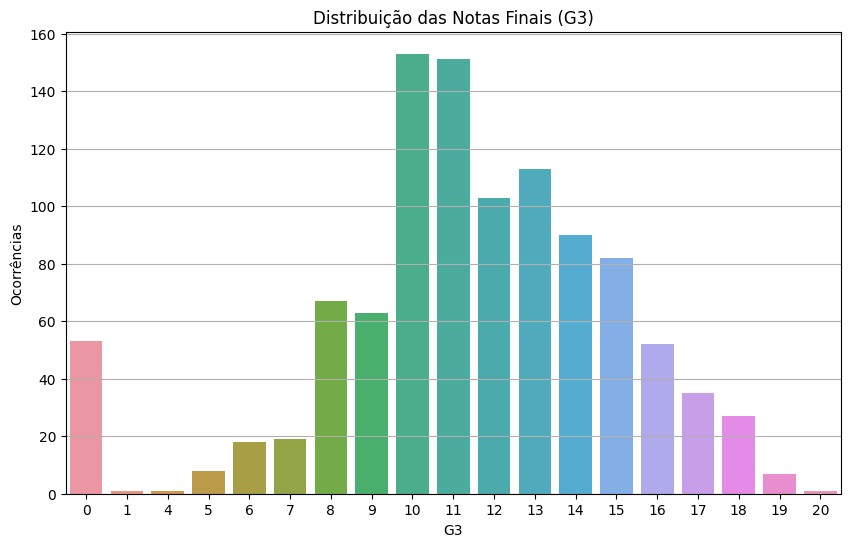

Alunos aprovados 814 (0.78) 
Alunos reprovaods 230 (0.22)


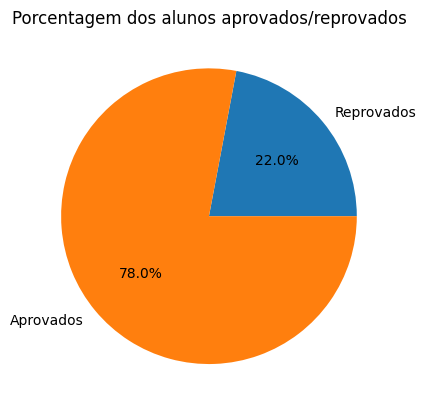

<Figure size 640x480 with 0 Axes>

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x = df['G3'])
plt.ylabel('Ocorrências')
ax = plt.gca()
ax.grid(which='major', axis='y', linestyle='-')
plt.title('Distribuição das Notas Finais (G3)')
plt.show()
plt.clf()

threshold_for_approval = 10

# Count rows with values above/below the threshold
count_below = len(df[df['G3'] < threshold_for_approval])
count_below_percent = count_below/len(df)
count_above = len(df[df['G3'] >= threshold_for_approval])
count_above_percent = count_above/len(df)
print(f'Alunos aprovados {count_above} ({round(count_above_percent, 2)}) \nAlunos reprovaods {count_below} ({round(count_below_percent, 2)})')

counts = [count_below, count_above]
labels = ['Reprovados', 'Aprovados']

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Porcentagem dos alunos aprovados/reprovados')
plt.show()
plt.clf()

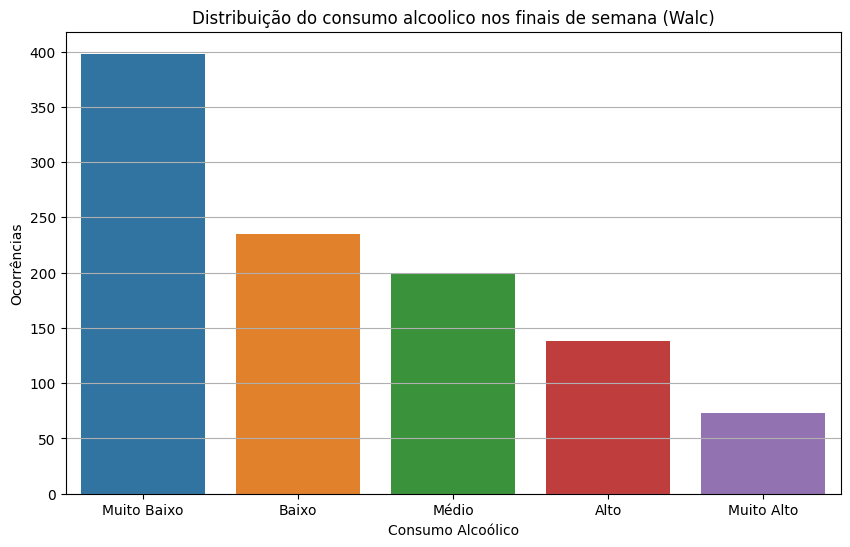

<Figure size 640x480 with 0 Axes>

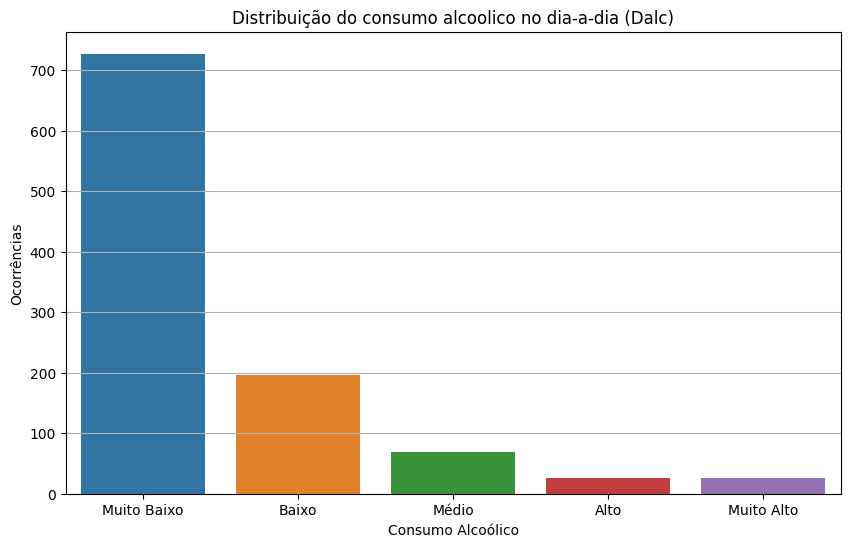

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df['Walc'])
ax = plt.gca()
ax.grid(which='major', axis='y', linestyle='-')
alc_labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

# Set the tick labels for the X-axis
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=alc_labels)
plt.xlabel('Consumo Alcoólico')
plt.ylabel('Ocorrências')
plt.title('Distribuição do consumo alcoolico nos finais de semana (Walc)')
plt.show()
plt.clf()

plt.figure(figsize=(10, 6))
sns.countplot(x = df['Dalc'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=alc_labels)
plt.xlabel('Consumo Alcoólico')
plt.ylabel('Ocorrências')
ax = plt.gca()
ax.grid(which='major', axis='y', linestyle='-')
plt.title('Distribuição do consumo alcoolico no dia-a-dia (Dalc)')
plt.show()

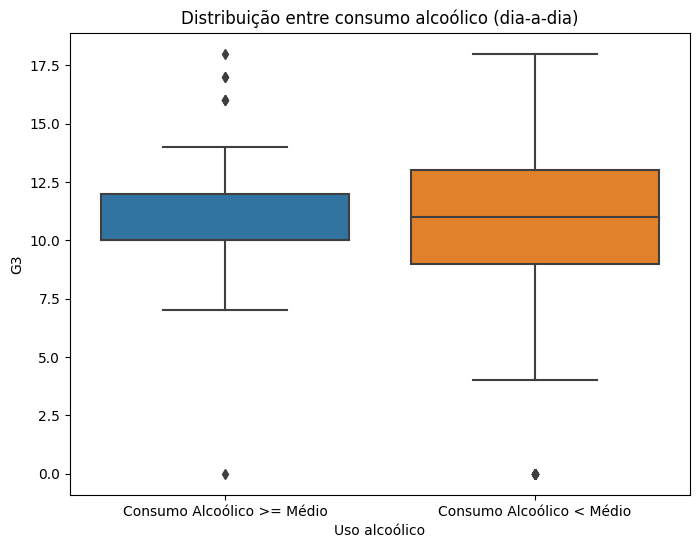

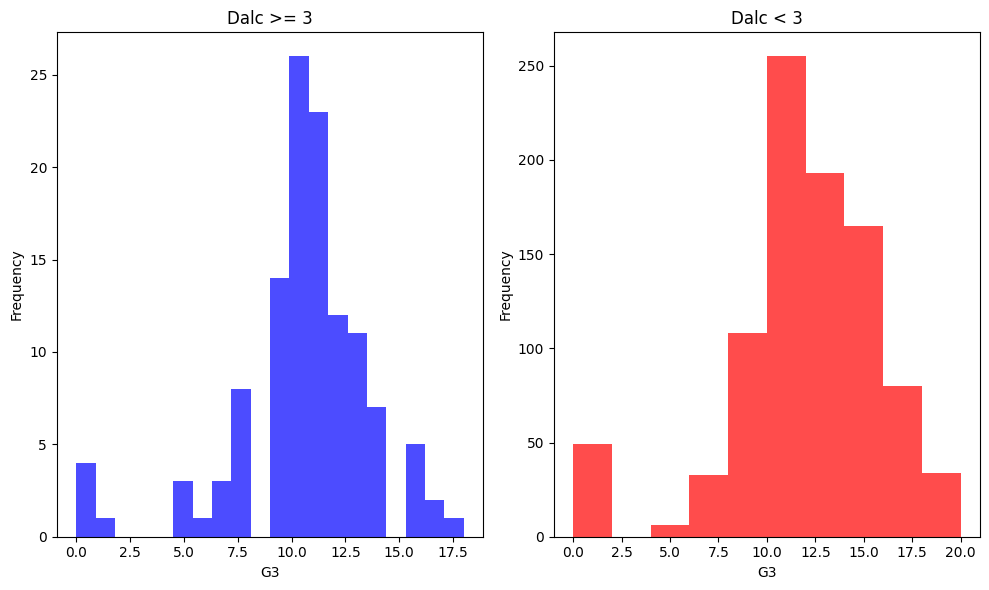

<Figure size 640x480 with 0 Axes>

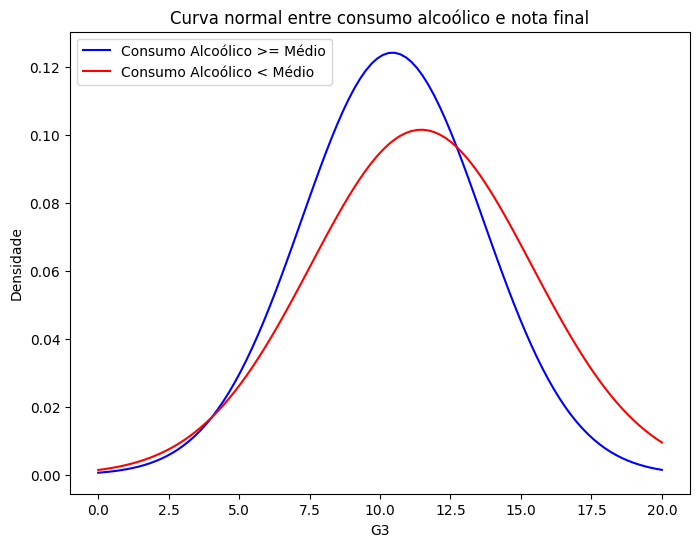

In [8]:
df_cat_3_or_above = df[df['Dalc'] >= 3]
df_cat_below_3 = df[df['Dalc'] < 3]
df_combined = pd.concat([df_cat_3_or_above, df_cat_below_3], axis=0)
df_combined['Dalc'] = df_combined['Dalc'].map({3: 'Consumo Alcoólico >= Médio', 2: 'Consumo Alcoólico < Médio'})

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dalc', y='G3', data=df_combined)

# Set the x-axis and y-axis labels, and title
plt.xlabel('Uso alcoólico')
plt.ylabel('G3')
plt.title('Distribuição entre consumo alcoólico (dia-a-dia)')

# Show the plot
plt.show()


# Plot two histograms side by side
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # First subplot
plt.hist(df_cat_3_or_above['G3'], bins=20, color='blue', alpha=0.7)
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.title('Dalc >= 3')

plt.subplot(1, 2, 2)  # Second subplot
plt.hist(df_cat_below_3['G3'], bins=10, color='red', alpha=0.7)
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.title('Dalc < 3')

plt.tight_layout()  # Adjust spacing between subplots

# Show the plot
plt.show()
plt.clf()


# Calculate mean and standard deviation for both categories
mu1, std1 = norm.fit(df_cat_3_or_above['G3'])
mu2, std2 = norm.fit(df_cat_below_3['G3'])

# Plot both normal curves on the same graph
plt.figure(figsize=(8, 6))

x = np.linspace(df['G3'].min(), df['G3'].max(), 100)
plt.plot(x, norm.pdf(x, mu1, std1), color='blue', label='Consumo Alcoólico >= Médio')
plt.plot(x, norm.pdf(x, mu2, std2), color='red', label='Consumo Alcoólico < Médio')

plt.xlabel('G3')
plt.ylabel('Densidade')
plt.title('Curva normal entre consumo alcoólico e nota final')
plt.legend()

# Show the plot
plt.show()

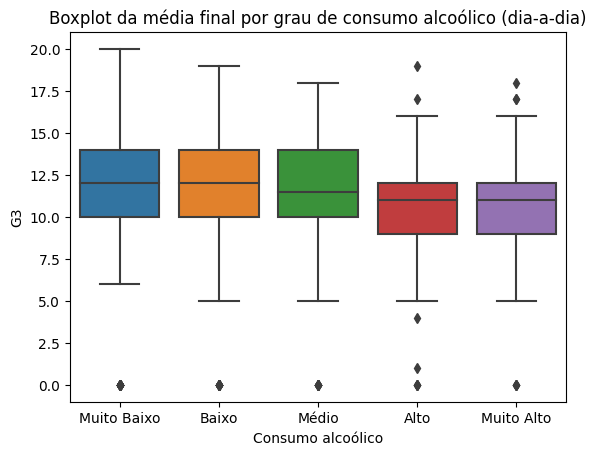

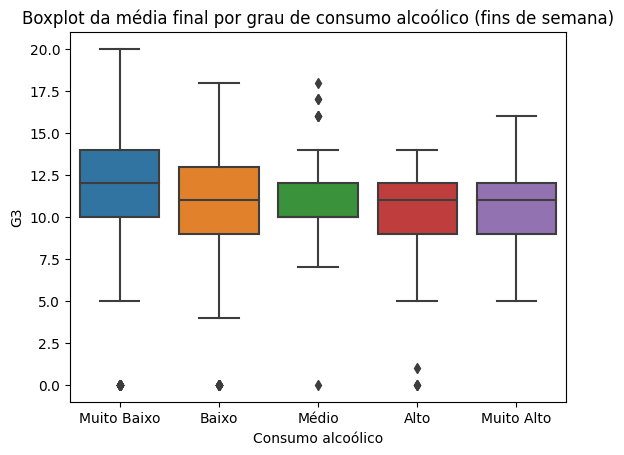

In [9]:
# Create a boxplot using Seaborn
sns.boxplot(x='Walc', y='G3', data=df)
# Set x-axis and y-axis labels
plt.xlabel('Consumo alcoólico')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=alc_labels)
plt.ylabel('G3')
# Set plot title
plt.title('Boxplot da média final por grau de consumo alcoólico (dia-a-dia)')
# Show the plot
plt.show()
# Create a boxplot using Seaborn
sns.boxplot(x='Dalc', y='G3', data=df)
# Set x-axis and y-axis labels
plt.xlabel('Consumo alcoólico')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=alc_labels)
plt.ylabel('G3')
# Set plot title
plt.title('Boxplot da média final por grau de consumo alcoólico (fins de semana)')
# Show the plot
plt.show()

(1044, 31)


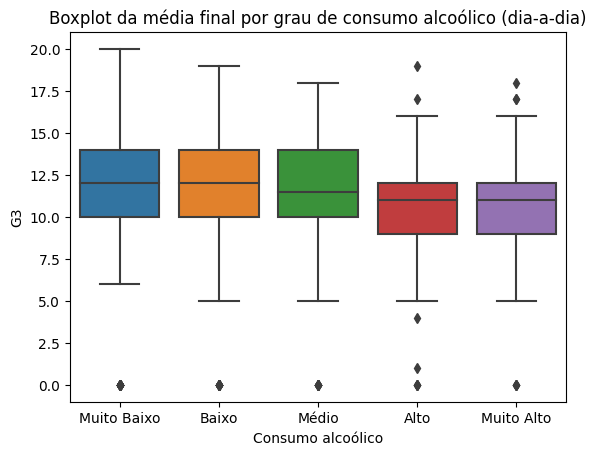

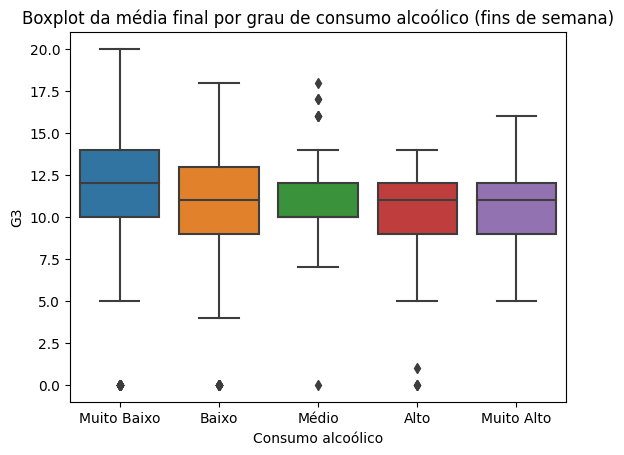

In [10]:
df['z_scores'] = np.abs(stats.zscore(df['G3']))
threshold = 3
df_no_outliers = df[df['z_scores'] < threshold]
df_no_outliers = df_no_outliers.drop(columns=['z_scores'])
df = df_no_outliers
print(df.shape)
# Create a boxplot using Seaborn
sns.boxplot(x='Walc', y='G3', data=df)
# Set x-axis and y-axis labels
plt.xlabel('Consumo alcoólico')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=alc_labels)
plt.ylabel('G3')
# Set plot title
plt.title('Boxplot da média final por grau de consumo alcoólico (dia-a-dia)')
# Show the plot
plt.show()
# Create a boxplot using Seaborn
sns.boxplot(x='Dalc', y='G3', data=df)
# Set x-axis and y-axis labels
plt.xlabel('Consumo alcoólico')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=alc_labels)
plt.ylabel('G3')
# Set plot title
plt.title('Boxplot da média final por grau de consumo alcoólico (fins de semana)')
# Show the plot
plt.show()

In [14]:
grouped_data = df.groupby('Dalc')['G3'].apply(list)
# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)
print('F-statistic:', f_statistic)
print('p-value:', p_value)
if p_value < 0.05:
    print("As diferêncas entre os grupos são estatisticamente significantes.")
else:
    print("As diferêncas entre os grupos NÃO são estatisticamente significantes.")

F-statistic: 6.24156863429061
p-value: 5.794348331246882e-05
As diferêncas entre os grupos são estatisticamente significantes.


In [12]:
median_per_walc = df.groupby('Walc')['G3'].median()
average_per_walc = df.groupby('Walc')['G3'].mean()

# Print the median and average values
print(f"Walc - Mediana:\n{median_per_walc}\nWalc - Média:\n{average_per_walc}")

# column_to_normalize = 'Dalc'
# min_value = df[column_to_normalize].min()
# max_value = df[column_to_normalize].max()
# df[column_to_normalize] = (df[column_to_normalize] - min_value) / (max_value - min_value)

column_to_normalize = 'G3'
min_value = df[column_to_normalize].min()
max_value = df[column_to_normalize].max()
df[column_to_normalize] = (df[column_to_normalize] - min_value) / (max_value - min_value)

print(df['G3'])

# Perform an independent samples t-test
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['Dalc'], df['G3'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation)
print("P-Value:", p_value)

Walc - Mediana:
Walc
1    12.0
2    12.0
3    11.5
4    11.0
5    11.0
Name: G3, dtype: float64
Walc - Média:
Walc
1    11.743719
2    11.472340
3    11.290000
4    10.536232
5    10.397260
Name: G3, dtype: float64
0      0.30
1      0.30
2      0.50
3      0.75
4      0.50
       ... 
644    0.50
645    0.80
646    0.45
647    0.50
648    0.55
Name: G3, Length: 1044, dtype: float64
Correlation Coefficient: -0.12964212480071222
P-Value: 2.650469037590554e-05
